In [17]:
%pip install gym==0.25.2

# Import used libraries
import numpy as np # Used to handle arrays
import gym # Handle the environment
import time # Handle the time
import math # Handle calculations

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
env = gym.make("CartPole-v1")

# Print the size of the env action space (number of agent available action)
print(env.action_space.n)

2


Now we gonna see an example of the environment return to understand all states returned by the environment.

We gonna see all of them on the console.

There is the official website explanation of the environment Actions and observations returned

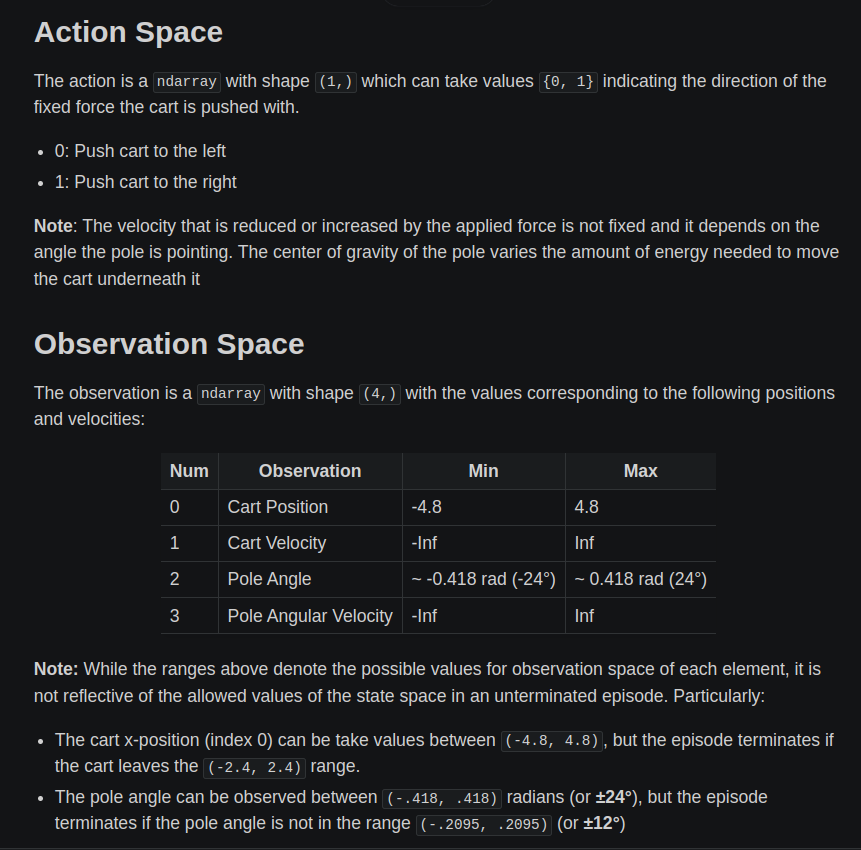

In [19]:
observation = env.reset()

for timestep in range(100):
  env.render()
  action = env.action_space.sample()
  observation, reward, done, _, _= env.step(action)

  print(observation, reward, done)

  if done:
    print("Finished after {} timesteps".format(timestep+1))


[ 0.04579621  0.16172238  0.04767387 -0.28451926] 1.0 False
[ 0.04903066  0.3561331   0.04198349 -0.5617932 ] 1.0 False
[ 0.05615332  0.55064154  0.03074763 -0.8409592 ] 1.0 False
[ 0.06716615  0.7453305   0.01392844 -1.1238163 ] 1.0 False
[ 0.08207276  0.5500288  -0.00854788 -0.82679725] 1.0 False
[ 0.09307334  0.74526656 -0.02508383 -1.1221563 ] 1.0 False
[ 0.10797867  0.55048233 -0.04752696 -0.8374458 ] 1.0 False
[ 0.11898832  0.74622005 -0.06427587 -1.1446885 ] 1.0 False
[ 0.13391271  0.94212    -0.08716964 -1.4568157 ] 1.0 False
[ 0.15275511  0.7481692  -0.11630595 -1.1925895 ] 1.0 False
[ 0.1677185   0.94458956 -0.14015774 -1.5193465 ] 1.0 False
[ 0.1866103   1.1411002  -0.17054467 -1.8522935 ] 1.0 False
[ 0.2094323   1.3376385  -0.20759054 -2.1927214 ] 1.0 False
[ 0.23618507  1.1450408  -0.25144497 -1.9706216 ] 1.0 True
Finished after 14 timesteps
[ 0.2590859   0.95330065 -0.2908574  -1.765204  ] 0.0 True
Finished after 15 timesteps
[ 0.2781519   0.7623957  -0.32616147 -1.575185

/home/tone/.local/lib/python3.10/site-packages/gym/envs/classic_control/cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(
/home/tone/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/tone/.local/lib/python3.10/site-packages/gym/envs/classic_control/cartpole.py:177: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


In [20]:
# Learning rate: The size of step we take in adjusting our actions
learning_rate = 0.1

# Discount factor: The importance of imediate rewards vs future rewards
gamma = 0.95

# Epochs: The amount of times that we gonna train
epochs = 60000

# Auxiliar variables to track the evolution
total_time = 0
total_reward = 0
previous_reward = 0

Observation = [30,30,50,50]
step_size = np.array([.25,.25,.01,.1])

# It is associated with how random an actions is
epsilon = 1

# exploration is decaying and we willget to paint of full exploitation
epsilon_decay_value = .99995

In [21]:
# Construct the table as a uniform distribution (between 0 and 1) to initialize a random Q-Table
# This may have the length of the lenght of the observations and the width of the available actions space
# It is how the Q-Table may be
q_table = np.random.uniform(low=0, high=1, size=(Observation+[env.action_space.n]))
print("Q-Table Shape:" + str(q_table.shape))
print(q_table[0][0])

Q-Table Shape:(30, 30, 50, 50, 2)
[[[0.1350719  0.82549106]
  [0.62075006 0.29671544]
  [0.56429896 0.7072447 ]
  ...
  [0.42241763 0.56335637]
  [0.11857327 0.49863447]
  [0.33299519 0.63440295]]

 [[0.72384009 0.23050524]
  [0.56748167 0.60101497]
  [0.67069029 0.75443632]
  ...
  [0.91846843 0.1958554 ]
  [0.81254227 0.01051525]
  [0.28143183 0.22600203]]

 [[0.43371478 0.84009255]
  [0.9565383  0.01244042]
  [0.55207697 0.62624239]
  ...
  [0.54854463 0.86216808]
  [0.33727259 0.68995336]
  [0.9380985  0.7252987 ]]

 ...

 [[0.7416067  0.17076442]
  [0.80938335 0.41911539]
  [0.27340891 0.19758229]
  ...
  [0.39953768 0.74347563]
  [0.3590607  0.50545431]
  [0.40555296 0.66186433]]

 [[0.37250501 0.31223645]
  [0.50843742 0.19591199]
  [0.58144998 0.30527934]
  ...
  [0.22452518 0.64020319]
  [0.23406561 0.12361741]
  [0.28333779 0.34115802]]

 [[0.13824817 0.84874497]
  [0.28230636 0.37661815]
  [0.9948171  0.55610508]
  ...
  [0.11827537 0.89578742]
  [0.27139042 0.58689729]
  [0

In [22]:
# Manipulating OpenAI Gym observations - discretize state
def get_discrete_state(state):
  # ? Why this values of the np.array ???
  discrete_state = state/step_size + np.array([15,10,1,10])
  return tuple(discrete_state.astype(np.int32))

In [23]:
# Iterating through n epochs
for epoch in range(epochs + 1):
  # Set the initial time, so we can calculate how much each action takes
  time_initial = time.time()

  # Get the discrete state for the restarted environment, se we know the current state
  discrete_state = get_discrete_state(env.reset())

  # Boolean to control our learning loop - tells if the game is running or not
  done = False

  # The reward is intialized at zero at the beginning of every eisode
  epoch_reward = 0

  # Every 1000 epochs we have an episode
  if epoch % 1000 == 0:
    print('Eposiode:' + str(epoch))

  while not done:
    # Now we are in our gameloop

    # If some random number is greater than epsilon, then we take the best possible action we have explored so far
    if np.random.random() > epsilon:
      # Trying to find the largest reward for the current state (exploitation)
      action = np.argmax(q_table[discrete_state])
    else:
      # Picking a random action (exploration)
      action = np.random.randint(0, env.action_space.n)

    # Intialize our new_state, reward, and done variables
    new_state, reward, done, _, _ = env.step(action)

    # Increase the current epoch reward
    epoch_reward += reward

    # Disccretize our new state
    new_discrete_state = get_discrete_state(new_state)

    # Render our environment after 2000 steps
    if epoch % 2000 == 0:
      env.render()

    # If the game loop is still running, update the q-table
    if not done:
      max_new_q = np.max(q_table[new_discrete_state])

      current_q = q_table[discrete_state + (action,)]

      new_q = (1-learning_rate)* current_q + learning_rate * (reward + gamma * max_new_q)

      q_table[discrete_state+(action,)] = new_q

    discrete_state = new_discrete_state

    # If our epsilon is greater than .05m
    if epsilon > 0.05:
      # And if our reward is greater than the previous and if we reached past our 10000 epoch, we recalculate episilon
      if epoch_reward > previous_reward and epoch > 10000:
          epsilon = math.pow(epsilon_decay_value, epoch - 10000)

      if epoch % 500 == 0:
        print("Epsilon: " + str(epsilon))

    # Final time fort this epoch
    time_final = time.time()

    # Total time of the episode
    episode_total = time_final - time_initial
    total_time += episode_total

    # Calculate and update rewards
    total_reward += epoch_reward
    previous_reward = epoch_reward

    # Every 1000 episodes print the average time and the average reward
    if epoch % 1000 == 0:
      mean_time = total_time / 1000
      print("Average time: " + str(mean_time))
      total_time = 0

      mean_reward = total_reward / 1000
      print("Average reward: " + str(mean_reward))
      total_reward = 0

env.close()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.